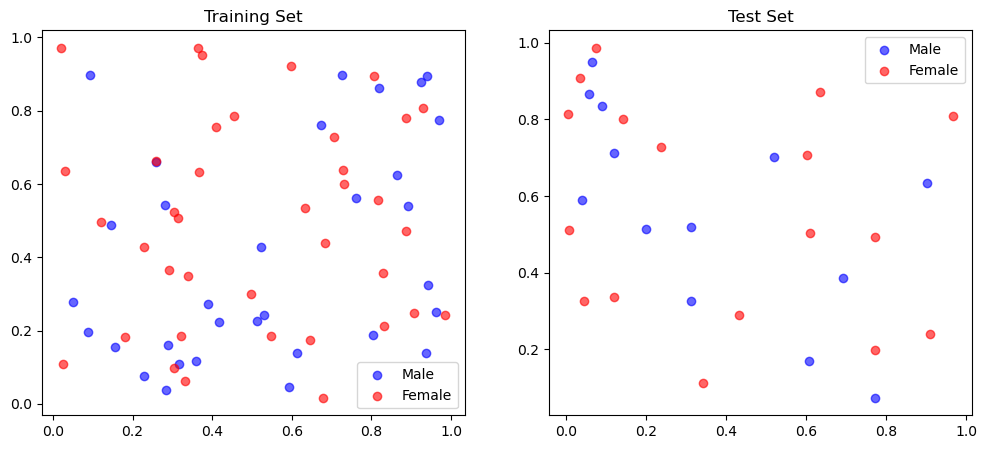

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 2)
y = np.random.choice(['Male', 'Female'], size=100)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Function to plot the dataset
def plot_data(X, y, title, ax):
    males = X[y == 'Male']
    females = X[y == 'Female']
    ax.scatter(males[:, 0], males[:, 1], color='blue', label='Male', alpha=0.6)
    ax.scatter(females[:, 0], females[:, 1], color='red', label='Female', alpha=0.6)
    ax.set_title(title)
    ax.legend()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot each subset
plot_data(X_train, y_train, 'Training Set', axes[0])
plot_data(X_test, y_test, 'Test Set', axes[1])

plt.show()


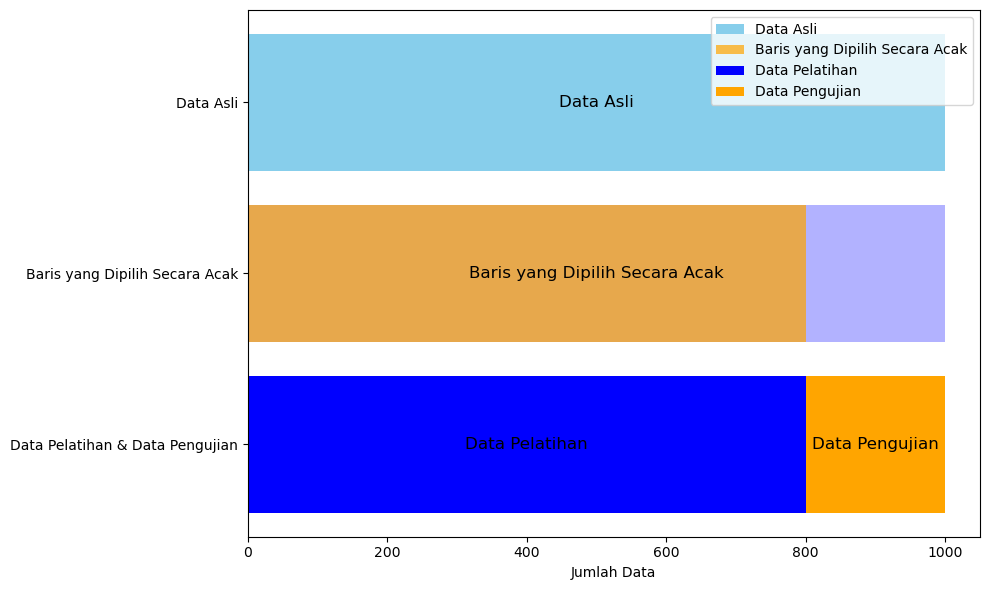

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Data
data_size = 1000
data = np.random.rand(data_size)
split_ratio = 0.8
split_index = int(data_size * split_ratio)

# Splitting data
train_data = data[:split_index]
test_data = data[split_index:]

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))

# Original Data
ax.barh(2, data_size, color='skyblue', label='Data Asli')
ax.text(data_size/2, 2, 'Data Asli', va='center', ha='center', fontsize=12, color='black')

# Randomly Selected Rows
random_indices = np.random.permutation(data_size)
ax.barh(1, data_size, color='blue', alpha=0.3)
ax.barh(1, split_index, color='orange', alpha=0.7, label='Baris yang Dipilih Secara Acak')
ax.text(data_size/2, 1, 'Baris yang Dipilih Secara Acak', va='center', ha='center', fontsize=12, color='black')

# Training and Testing Data
ax.barh(0, split_index, color='blue', label='Data Pelatihan')
ax.barh(0, data_size - split_index, left=split_index, color='orange', label='Data Pengujian')
ax.text(split_index/2, 0, 'Data Pelatihan', va='center', ha='center', fontsize=12, color='black')
ax.text(split_index + (data_size - split_index)/2, 0, 'Data Pengujian', va='center', ha='center', fontsize=12, color='black')

# Adding labels and title
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(['Data Pelatihan & Data Pengujian', 'Baris yang Dipilih Secara Acak', 'Data Asli'])
ax.set_xlabel('Jumlah Data')
# ax.set_title('Ilustrasi Pemisahan Data Acak dalam Ilmu Data')

plt.legend()
plt.tight_layout()
plt.show()


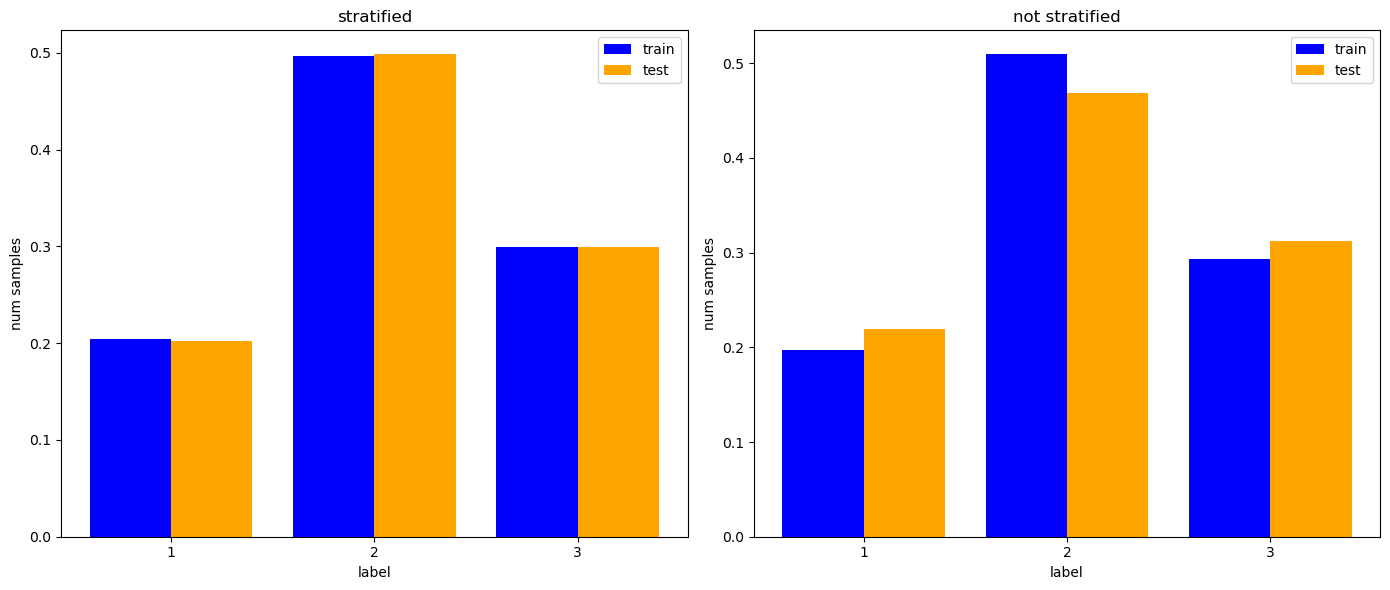

In [12]:
# Define different split ratio
split_ratio = 0.7

# Stratified split with new ratio
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=1-split_ratio, random_state=42)
train_idx, test_idx = next(strat_split.split(X, y))
X_train_strat, X_test_strat = X[train_idx], X[test_idx]
y_train_strat, y_test_strat = y[train_idx], y[test_idx]

# Random split with new ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-split_ratio, random_state=42)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Stratified split
axes[0].hist([y_train_strat, y_test_strat], bins=np.arange(1, 5) - 0.5, density=True, color=['blue', 'orange'], label=['train', 'test'])
axes[0].set_xticks([1, 2, 3])
axes[0].set_title('stratified')
axes[0].set_xlabel('label')
axes[0].set_ylabel('num samples')
axes[0].legend()

# Random split
axes[1].hist([y_train, y_test], bins=np.arange(1, 5) - 0.5, density=True, color=['blue', 'orange'], label=['train', 'test'])
axes[1].set_xticks([1, 2, 3])
axes[1].set_title('not stratified')
axes[1].set_xlabel('label')
axes[1].set_ylabel('num samples')
axes[1].legend()

plt.tight_layout()
plt.show()


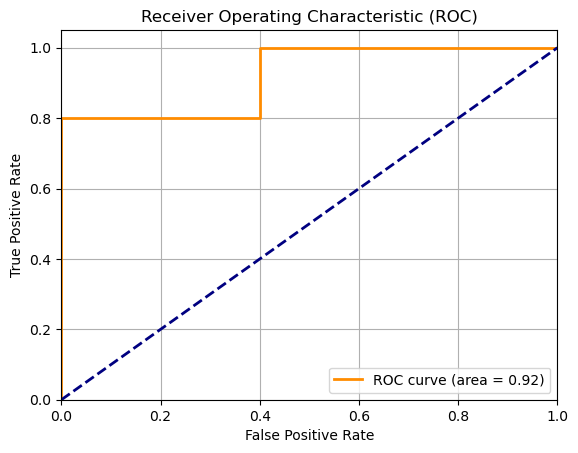

In [6]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# True labels dan skor prediksi
y_true = np.array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8, 0.2, 0.6, 0.3, 0.75, 0.5, 0.9])

# Menghitung ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

